In [5]:
speed=[4,4,7,7,8,9,10,10,10,11,11,12,12,12,12,13,13,13,13,14,14,14,14,15,15,15,16,16,17,17,17,18,18,18,18,19,19,19,20,20,20,20,20,22,23,24,24,24,24,25]
dist=[2,10,4,22,16,10,18,26,34,17,28,14,20,24,28,26,34,34,46,26,36,60,80,20,26,54,32,40,32,40,50,42,56,76,84,36,46,68,32,48,52,56,64,66,54,70,92,93,120,85]

In [6]:
import pandas as pd

df=pd.DataFrame()
df['speed'] =speed
df['dist'] =dist
df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


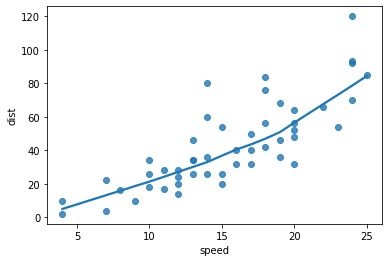

In [7]:
import seaborn as sns

sns.regplot('speed', 'dist', lowess=True, data = df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("V

Text(0.5, 1.0, 'Distance')

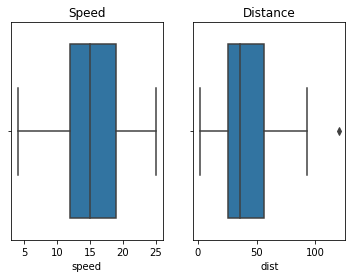

In [8]:
import matplotlib.pyplot as plt

# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 상자 그림을 첫번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('speed', data=df, ax=ax1, orient='v')
ax1.set_title('Speed')

# dist의 상자 그림을 두번째(ax2)로 그린다.
sns.boxplot('dist', data=df, ax=ax2, orient='v')
ax2.set_title('Distance')

Text(0.5, 1.0, 'Distance')

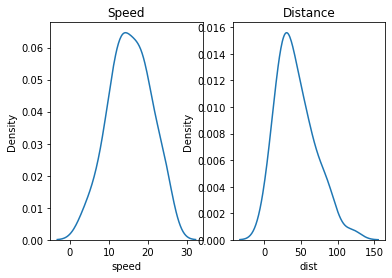

In [9]:
# 정규분포
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('Speed')

# dist의 밀도 플롯
sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('Distance')

#### 회기분석 공식 이해












































































In [10]:
import numpy as np
import pandas as pd

x=[20,25,30,34,40]
y=[26,30,40,48,66]

df=pd.DataFrame()
df['x']=x
df['y']=y

# 분산
print(np.var(x)) # 모분산
print(df['x'].var()) # 표본 분산

# 표준편차
print(np.sqrt(np.var(x))) 
print(np.sqrt(df['x'].var()))

48.160000000000004
60.2
6.939740629158989
7.758865896508329


#### sklearn을 이용한 회기분석 샘플

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [12]:
##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='test')

In [13]:
train_df.head()

,Father,Son
0,165.100,151.892
1,165.100,160.782
2,167.132,159.512
3,155.194,163.322
4,160.020,163.068


In [14]:
##########데이터 전처리
x_train_df = train_df.drop(['Son'], axis=1)
y_train_df = train_df['Son']

x_test_df = test_df.drop(['Son'], axis=1)
y_test_df = test_df['Son']

In [15]:
#데이터프레임을 지원하지 않는 머신러닝 프레임워크도 있기 때문에 데이터프레임을 넘파이 배열로 변환
x_train = x_train_df.to_numpy() 
x_test = x_test_df.to_numpy()

y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()

In [16]:
# LinearRegression 객체(인스턴스) 생성
model = LinearRegression()

##########모델 학습
model.fit(x_train, y_train)

LinearRegression()

In [17]:
model.coef_, model.intercept_

(array([0.51820601]), 85.30837062148488)

In [18]:
# 
x_train[0],  x_train[0]*model.coef_+model.intercept_ 

(array([165.1]), array([170.86418334]))

In [19]:
model.predict([x_train[0]])

array([170.86418334])

- 스칼라: a=3, b=4
- 벡터(크기와 방향을 갖고있는 스칼라 집합): [3], [3,4] => [2,3], [3, 4, 5]
- 어레이:[[1,2,3], [4,5,6]]
- 텐서: [[[1,2,3], [4,5,6]]]


### OLS(Ordinary Least Squares): 최소제곱법
- 최소제곱법 (OLS) = 오차의 제곱의 합 = 가상 이상적인 추세선

### 회귀의 주요 평가 지표(p304)
- MAE (Mean Absolute Error): 실제 값과 예측값의 차이(잔차/오차)를 절댓값으로 변환해 평균한 것
- MSE (Mean Squared Log Error): 실제 값과 예측값의 차이를 제곱해 평균한 것
- RMSE (Root Mean Squared Eerror): MSE 같은 오류의 제곱을 구할때 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것
- R^2 (R square, 결정계수): 우리가 만든 모델이 데이터를 얼마나 예측하는지에 대한 지표(1에 가까울 수록 좋은 모델)
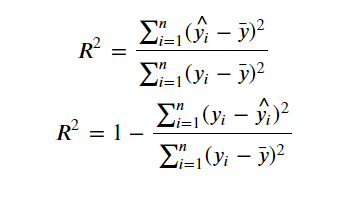

In [20]:
import pandas as pd

df=pd.DataFrame({'실제값':y_train,'예측값':model.predict(x_train)})
df['오차']=abs(df['실제값']-df['예측값'])
mae=df['오차'].mean()
mae

4.850241554699021

In [21]:
df[df['오차']>10].index


Int64Index([  0,   1,   2,   7,  29,  33, 112, 135, 136, 139, 140, 144, 145,
            146, 147, 149, 152, 153, 157, 159, 161, 170, 188, 279, 286, 287,
            291, 294, 295, 296, 297, 302, 304, 306, 307, 318, 337, 429, 430,
            436, 438, 439, 440, 443, 444, 445, 450, 452, 456, 458, 469, 491,
            549, 562, 563, 564, 575, 583, 584, 589, 591, 592, 593, 594, 600,
            602, 609, 620, 637, 728, 736, 737, 742, 743, 747, 748, 749, 751],
           dtype='int64')

(array([229., 187., 155.,  88.,  45.,  22.,  13.,   7.,   4.,   5.]),
 array([1.68426151e-03, 2.28903776e+00, 4.57639126e+00, 6.86374476e+00,
        9.15109825e+00, 1.14384518e+01, 1.37258053e+01, 1.60131587e+01,
        1.83005122e+01, 2.05878657e+01, 2.28752192e+01]),
 <a list of 10 Patch objects>)

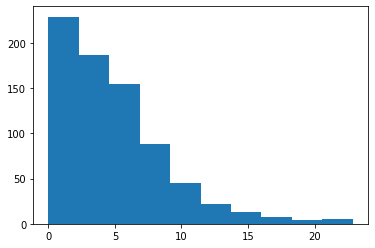

In [22]:
import matplotlib.pyplot as plt
plt.hist(df['오차'])

In [23]:
df.loc[df[df['오차']>10].index]

,실제값,예측값,오차
0,151.892,170.864183,18.972183
1,160.782,170.864183,10.082183
2,159.512,171.917178,12.405178
7,162.560,173.496670,10.936670
29,168.656,179.814638,11.158638
...,...,...,...
743,187.452,175.602659,11.849341
747,192.024,181.525754,10.498246
748,196.088,177.313775,18.774225
749,195.072,180.867632,14.204368


In [24]:
err=[10,20,30,40]

for x in err:
    display(df.loc[df[df['오차']>x].index])

,실제값,예측값,오차
0,151.892,170.864183,18.972183
1,160.782,170.864183,10.082183
2,159.512,171.917178,12.405178
7,162.560,173.496670,10.936670
29,168.656,179.814638,11.158638
...,...,...,...
743,187.452,175.602659,11.849341
747,192.024,181.525754,10.498246
748,196.088,177.313775,18.774225
749,195.072,180.867632,14.204368


,실제값,예측값,오차
139,188.722,168.363321,20.358679
294,196.088,175.207786,20.880214
297,148.590,169.547940,20.957940
444,198.628,177.577024,21.050976
593,199.136,176.260781,22.875219
594,155.448,177.708648,22.260648


,실제값,예측값,오차


,실제값,예측값,오차


In [25]:
df=pd.DataFrame({'실제값':y_train,'예측값':model.predict(x_train)})
df['오차']=abs(df['실제값']-df['예측값'])

In [26]:
# SSE 계산
a=np.array([1,2,3])
print(a**2)
print(np.sum(a**2))

SSE=np.sum(df['오차']**2)
SSE

[1 4 9]
14


29616.220798740178

In [27]:
# MAE 계산: 오차 절대값에 대한 평균
mae=np.mean(abs(df['오차']))
mae

4.850241554699021

In [28]:
# MSE 계산: 오차 제곱 평균
mse=np.mean(df['오차']**2)
mse

39.22678251488765

In [29]:
# RMSE: 오차 제곱 평균에 루트 적용
rmse1=np.sqrt(np.mean(df['오차']**2))
rmse2=np.sqrt(mse)
print(rmse1, rmse2)

6.263128811934787 6.263128811934787


In [30]:
# R^2 평가 모델


In [31]:
# 모델 평가: 예를 들어 MSE, RMSE 평가 기준 값입니다.
from sklearn.metrics import mean_squared_error, r2_score

y_pred=model.predict(x_train)

mse = mean_squared_error(y_train , y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y_train, y_pred)

print(mse, rmse, r2)

39.22678251488765 6.263128811934787 0.24967004992776742


#### 경사하강법(p294~)
- 선형회귀모델에서는 MSE를 통해 모델을 평가하는데 MSE의 최소값이 최적의 모델
-  MSE의 최소값은 MSE를 미분하여 그라디언트가 영벡터가 되는 지점

        step 1: 가중치와 절편을 임의의 값으로 설정 하고 첫 손실을 계산.
        step 2: 경사하강법을 이용해 가중치와 절편을 업데이트 한 후 다시 손실을 계산
        step 3: 가중치, 절편의 값이 변경되었으면 step2를 반복하고, 더 이상 가중치, 절편의 값이 변경 되지 않으면 반복을 중지한다.

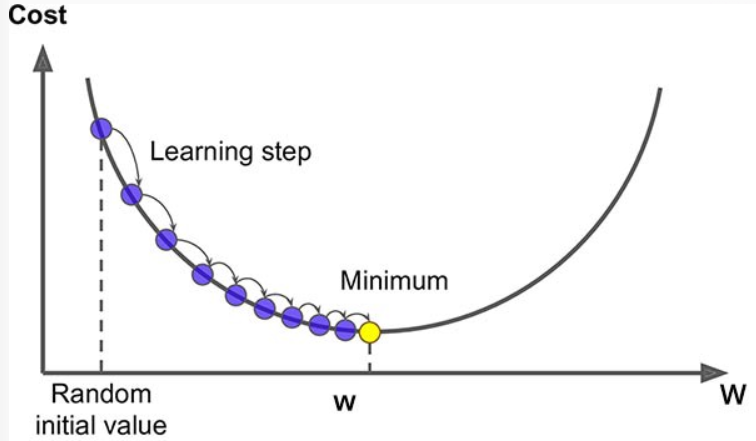

- 학습률 (Learning rate)
        - 기울기에 따라 이동할 step의 크기. 경사하강법 알고리즘에서 지정해야하는 하이퍼 파라미터이다.
        - 학습률을 너무 작게 잡으면 최소값에 수렴하기 위해 많은 반복을 진행해야해 시간이 오래걸린다.
        - 학습률을 너무 크게 잡으면 왔다 갔다 하다가 오히려 더 큰 값으로 발산하여 최소값에 수렴하지 못하게 된다.

- 경사하강법 구현

In [32]:
def f(x):
    return (x-1)**2 + 2 

# f함두의 도함수
def fd(x):
    return 2*(x-1)

w=0.00, 기울기=-2.00


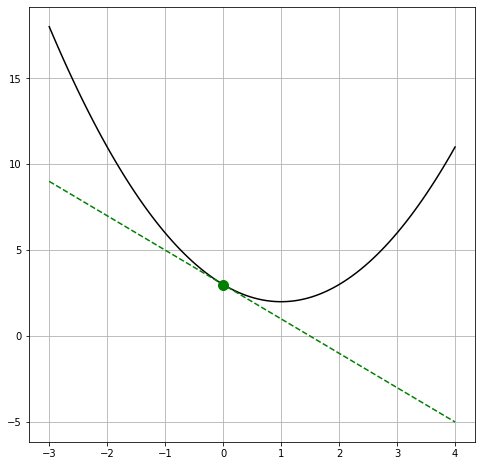

In [47]:
import matplotlib.pyplot as plt

x=np.linspace(-3, 4, 100) # -3~4 사이의 100개 숫자 생성

plt.figure(figsize=(8, 8))
plt.plot(x, f(x), 'k-')

l_rate = 0.4
w=0

plt.plot(w, f(w), 'go', markersize='10')
plt.plot(x, fd(w)*(x)+f(w), 'g--')
print(f'w=%.2f, 기울기=%.2f'%(w, fd(w)))
plt.grid(True)

plt.show()

w=0.94, 기울기=-0.11


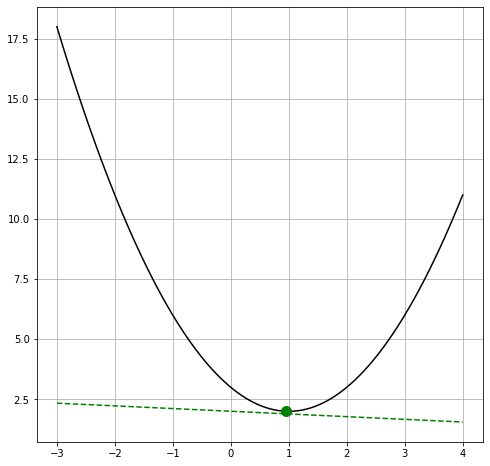

In [50]:
w=w-l_rate*fd(w)

plt.figure(figsize=(8, 8))
plt.plot(x, f(x), 'k-')

plt.plot(w, f(w), 'go', markersize='10')
plt.plot(x, fd(w)*(x)+f(w), 'g--')
print('w=%.2f, 기울기=%.2f'%(w, fd(w)))
plt.grid(True)

plt.show()

w=0.99, 기울기=-0.02


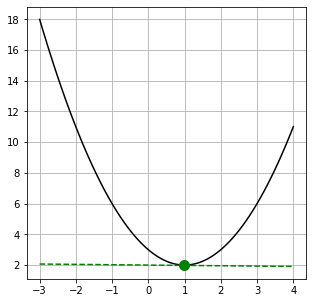

In [51]:
w=w-l_rate*fd(w)

plt.figure(figsize=(5, 5))
plt.plot(x, f(x), 'k-')

plt.plot(w, f(w), 'go', markersize='10')
plt.plot(x, fd(w)*(x)+f(w), 'g--')
print('w=%.2f, 기울기=%.2f'%(w, fd(w)))
plt.grid(True)

plt.show()

w=1.00, 기울기=-0.00


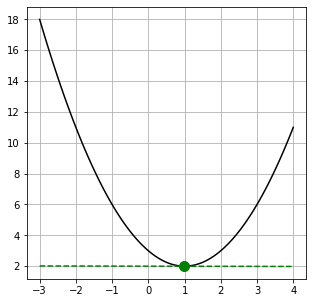

In [52]:
w=w-l_rate*fd(w)

plt.figure(figsize=(5, 5))
plt.plot(x, f(x), 'k-')

plt.plot(w, f(w), 'go', markersize='10')
plt.plot(x, fd(w)*(x)+f(w), 'g--')
print('w=%.2f, 기울기=%.2f'%(w, fd(w)))
plt.grid(True)

plt.show()

w=1.00, 기울기=-0.00


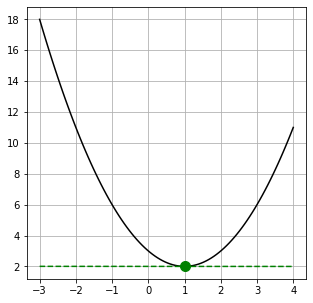

In [53]:
w=w-l_rate*fd(w)

plt.figure(figsize=(5, 5))
plt.plot(x, f(x), 'k-')

plt.plot(w, f(w), 'go', markersize='10')
plt.plot(x, fd(w)*(x)+f(w), 'g--')
print('w=%.2f, 기울기=%.2f'%(w, fd(w)))
plt.grid(True)

plt.show()

#### 보스턴 집값 데이터를 이용한 회기모델 생성

In [58]:
from sklearn.model_selection import train_test_split   # 하나의 데이터에서 train/test 데이터 생성 모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [65]:
# boston 데이터셋 가져오기
from sklearn.datasets import load_boston
boston = load_boston()

In [66]:
print(boston.keys())

# boston 데이타셋 DataFrame 변환 
boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)
boston_df['PRICE'] = boston.target  # 가격 필드 추가

boston_df.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [68]:
## 데이터 사이즈
boston_df.shape

(506, 14)

In [75]:
# 데이터에서 학습데이터/테스트데이터 정의

x_data=boston_df.drop(['PRICE'], axis=1)
y_target=boston_df['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=111)
print(x_train.shape, y_train.shape)

(354, 13) (354,)


In [87]:
import re
# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()

lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print(f'MSE:{mse}, RMSE:{rmse}')
print(f'R2: {r2_score(y_test, y_preds)}')
print()
print(f'회기계수:{lr.coef_} \n 절편: {lr.intercept_}')

MSE:27.99960806694491, RMSE:5.291465587806927
R2: 0.7176788943158751

회기계수:[-1.09157080e-01  5.02782968e-02  3.21113040e-02  1.34263702e+00
 -1.45043183e+01  3.62572933e+00 -9.15573554e-03 -1.36708906e+00
  2.50151886e-01 -1.09052747e-02 -9.02314059e-01  9.70411266e-03
 -5.48954989e-01] 
 절편: 35.076122838193484


#### 데이터 전처리
##### 선형 회귀 모델을 위한 데이터 변환
- 피처(x)와 타깃(y)값 간에 선형의 관계가 있다라는 가정
- 선형회귀 모델은 피처값과 타깃값의 분포가 정규분포 형태를 매우 선호
- 타깃값(y)의 경우 정규분포가 아니라 특정값의 분포가 치우친 왜곡(skew)된 형태의 분포도일 경우 예측성능에 부정적인 영향을 미칠 가능성 높음
-  선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행
    - 피처(x)
        - StandardScaler 클래스를 이용해 평균 0, 분산 1인 표준 정규분포를 가진 데이터 세트로 변환<br>
        (Xi - X의 평균) / X의 표준편차
        - MinMaxScaler 클래스를 이용해 최솟값이 0이고, 최댓값이 1인 값으로 정규화를 수행<br>
        (X - X의 최솟값)/( X의 최댓값 - X의 최솟값 )
        - log 변환
        -  categorical variable: label encoding이 아닌 one-hot encoding 수행
    - 타깃(y): log 변환

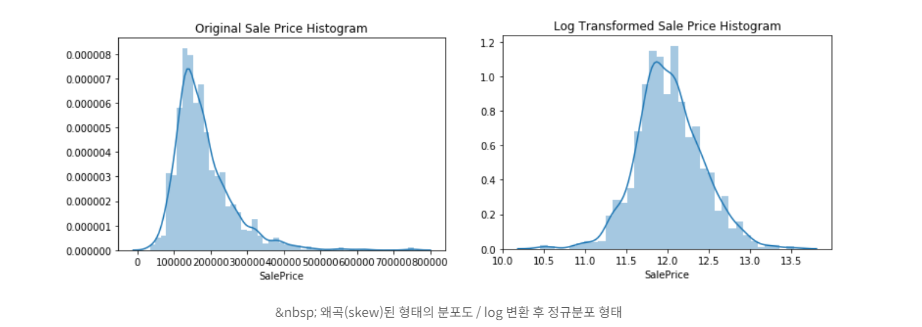


In [93]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# boston 데이터셋 가져오기
from sklearn.datasets import load_boston
boston = load_boston()

# 평균/분산
boston_df = pd.DataFrame(boston.data , columns = boston.feature_names)

print(boston_df.mean())
print()
print(boston_df.var())

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
dtype: float64


In [96]:
# StandardScaler

scaler = StandardScaler()
scaler.fit(boston_df)

boston_scaler = scaler.transform(boston_df)

boston_scaler_df=pd.DataFrame()